In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import rdkit
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from mordred import Calculator, descriptors
from rdkit.Chem import rdFingerprintGenerator
import matplotlib.pyplot as plt
import umap.umap_ as umap
import umap.plot
from sklearn.cluster import SpectralClustering

c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\supak\AppData\Local\Programs\Python\Python3

In [2]:
df = pd.read_csv("data_compound.csv")
df

,sid,cid,smiles,bioactivity,type,value (nM)
0,316936203,118159182,C[C@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CC...,Active,IC50,0.0066
1,316936247,118159176,C[C@@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3C...,Active,IC50,0.0083
2,316936221,118159272,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)C(C...,Active,IC50,0.0085
3,316936228,118159276,CC(C)NC1=NC2=C(CN(CC2)C)N=C1N3CCC(CC3)C(=O)C4=...,Active,IC50,0.0088
4,316936201,118159362,CN(C)C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CCC(...,Active,IC50,0.0091
...,...,...,...,...,...,...
1629,336857410,9966680,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC3=CC=CC=C32,Unspecified,IC50,100000.0000
1630,336857410,9966680,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC3=CC=CC=C32,Unspecified,IC50,100000.0000
1631,336857473,4526747,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC=C2,Unspecified,IC50,100000.0000
1632,336857473,4526747,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC=C2,Unspecified,IC50,100000.0000


In [3]:
df_hist = df[['cid','smiles','bioactivity', 'type', 'value (nM)']]
df_hist = df_hist[df_hist["bioactivity"] != 'Unspecified']
df_hist

,cid,smiles,bioactivity,type,value (nM)
0,118159182,C[C@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CC...,Active,IC50,0.0066
1,118159176,C[C@@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3C...,Active,IC50,0.0083
2,118159272,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)C(C...,Active,IC50,0.0085
3,118159276,CC(C)NC1=NC2=C(CN(CC2)C)N=C1N3CCC(CC3)C(=O)C4=...,Active,IC50,0.0088
4,118159362,CN(C)C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CCC(...,Active,IC50,0.0091
...,...,...,...,...,...
1352,118159118,CC(C)NC1=NC2=C(CCN(C2)C(=O)C)N=C1N3CCN(CC3)CC4...,Inactive,IC50,362900.0000
1353,118159228,CC(C)NC1=NC2=C(CCN(C2)C(=O)N3CCCC3)N=C1N4CCC(C...,Inactive,IC50,391000.0000
1354,118159228,CC(C)NC1=NC2=C(CCN(C2)C(=O)N3CCCC3)N=C1N4CCC(C...,Inactive,IC50,391000.0000
1355,118159128,CC(=O)N1CCC2=C(C1)N=C(C(=N2)N3CCC(CC3)OC4=C(C=...,Inactive,IC50,603900.0000


In [4]:
IC50_only = df_hist[df_hist['type']=='IC50'].reset_index(drop=True)
IC50_only['pIC50'] = 9 - np.log10(IC50_only['value (nM)'])
IC50_only = IC50_only.drop_duplicates(keep='first', ignore_index=True)
IC50_only

,cid,smiles,bioactivity,type,value (nM),pIC50
0,118159182,C[C@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CC...,Active,IC50,0.0066,11.180456
1,118159176,C[C@@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3C...,Active,IC50,0.0083,11.080922
2,118159272,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)C(C...,Active,IC50,0.0085,11.070581
3,118159276,CC(C)NC1=NC2=C(CN(CC2)C)N=C1N3CCC(CC3)C(=O)C4=...,Active,IC50,0.0088,11.055517
4,118159362,CN(C)C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CCC(...,Active,IC50,0.0091,11.040959
...,...,...,...,...,...,...
579,118159281,CC(C)NC1=NC2=C(CCN(C2)C(=O)C3CC3)N=C1N4CCC(CC4...,Inactive,IC50,340200.0000,3.468266
580,118159155,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)S(=...,Inactive,IC50,341500.0000,3.466609
581,118159118,CC(C)NC1=NC2=C(CCN(C2)C(=O)C)N=C1N3CCN(CC3)CC4...,Inactive,IC50,362900.0000,3.440213
582,118159228,CC(C)NC1=NC2=C(CCN(C2)C(=O)N3CCCC3)N=C1N4CCC(C...,Inactive,IC50,391000.0000,3.407823


<Figure size 2000x2000 with 0 Axes>

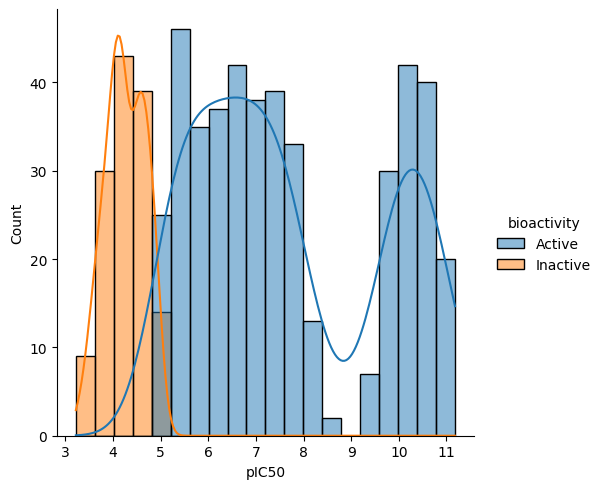

In [5]:
plt.figure(figsize=(20, 20))

sns.displot(IC50_only, bins=20, x='pIC50', hue='bioactivity', kde=True)
plt.show()

In [6]:
def canonical_smiles(smiles):
    mol_smiles = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mol_smiles]

    return smiles

In [7]:
CANNO_SMILES = canonical_smiles(IC50_only.smiles)
len(CANNO_SMILES)

584

In [8]:
IC50_only['smiles'] = CANNO_SMILES
IC50_only

,cid,smiles,bioactivity,type,value (nM),pIC50
0,118159182,CO[C@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc...,Active,IC50,0.0066,11.180456
1,118159176,CO[C@@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4cc...,Active,IC50,0.0083,11.080922
2,118159272,CC(=O)N1CCc2nc(NC(C)C)c(N3CCC(C(F)c4ccc(F)cc4F...,Active,IC50,0.0085,11.070581
3,118159276,CC(C)Nc1nc2c(nc1N1CCC(C(=O)c3cc(Cl)ccc3F)CC1)C...,Active,IC50,0.0088,11.055517
4,118159362,CN(C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc(F)cc...,Active,IC50,0.0091,11.040959
...,...,...,...,...,...,...
579,118159281,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,340200.0000,3.468266
580,118159155,COc1cccc(S(=O)(=O)C2CCN(c3nc4c(nc3NC(C)C)CCN(C...,Inactive,IC50,341500.0000,3.466609
581,118159118,CC(=O)N1CCc2nc(N3CCN(Cc4ccc(C#N)cc4F)CC3)c(NC(...,Inactive,IC50,362900.0000,3.440213
582,118159228,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,391000.0000,3.407823


Morgan Fingerprint

In [9]:
compounds_morgan = []

for _, smiles, bioactivity, pIC50 in IC50_only[['smiles', 'bioactivity', 'pIC50']].itertuples():
    compounds_morgan.append((Chem.MolFromSmiles(smiles), bioactivity, pIC50))
compounds_morgan[:5]

[(<rdkit.Chem.rdchem.Mol at 0x290872385f0>, 'Active', 11.18045606445813),
 (<rdkit.Chem.rdchem.Mol at 0x29087239230>, 'Active', 11.080921907623926),
 (<rdkit.Chem.rdchem.Mol at 0x29087238ba0>, 'Active', 11.070581074285707),
 (<rdkit.Chem.rdchem.Mol at 0x29087239f50>, 'Active', 11.05551732784983),
 (<rdkit.Chem.rdchem.Mol at 0x29087239070>, 'Active', 11.040958607678906)]

In [10]:
compounds_morgan_structure = pd.DataFrame(compounds_morgan, columns=["Structure", "bioactivity", "pIC50"])
compounds_morgan_structure.head(5)

,Structure,bioactivity,pIC50
0,<rdkit.Chem.rdchem.Mol object at 0x00000290872...,Active,11.180456
1,<rdkit.Chem.rdchem.Mol object at 0x00000290872...,Active,11.080922
2,<rdkit.Chem.rdchem.Mol object at 0x00000290872...,Active,11.070581
3,<rdkit.Chem.rdchem.Mol object at 0x00000290872...,Active,11.055517
4,<rdkit.Chem.rdchem.Mol object at 0x00000290872...,Active,11.040959


In [11]:
def generate_mfpts(data):
    Mfpts = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in data]
    return Mfpts

mfpts = generate_mfpts(compounds_morgan_structure.Structure[:])
print("Number of compounds converted:", len(mfpts))
print("Fingerprint length per compound:", len(mfpts[0]))

Number of compounds converted: 584
Fingerprint length per compound: 2048


In [12]:
fp_name_morgan = [f'Bit_{i}' for i in range(2048)]
fp_bits_morgan = [list(l) for l in mfpts]

morganfp_df = pd.DataFrame(fp_bits_morgan, index=IC50_only["bioactivity"], columns=fp_name_morgan)
morganfp_df.reset_index(inplace=True)  # Reset index to bring "cid" back as a column
morganfp_df.rename(columns={"index": "bioactivity"})# Rename the index column to "cid"
morganfp_df.head()

,bioactivity,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
morganfp_df_umap = morganfp_df.iloc[:, 1:]
morganfp_df_umap

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
580,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


RDK5 Fingerprint

In [14]:
compounds_rdk5 = []

for _, smiles, bioactivity in IC50_only[['smiles', 'bioactivity']].itertuples():
    compounds_rdk5.append((Chem.MolFromSmiles(smiles), bioactivity))
compounds_rdk5[:5]

[(<rdkit.Chem.rdchem.Mol at 0x290893eb220>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x290893eb4c0>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x290893ebbc0>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x290893ebae0>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x290893eb290>, 'Active')]

In [15]:
compound_rdk5_structure = pd.DataFrame(compounds_rdk5, columns=["Structure", "bioactivity"])
compound_rdk5_structure

,Structure,bioactivity
0,<rdkit.Chem.rdchem.Mol object at 0x00000290893...,Active
1,<rdkit.Chem.rdchem.Mol object at 0x00000290893...,Active
2,<rdkit.Chem.rdchem.Mol object at 0x00000290893...,Active
3,<rdkit.Chem.rdchem.Mol object at 0x00000290893...,Active
4,<rdkit.Chem.rdchem.Mol object at 0x00000290893...,Active
...,...,...
579,<rdkit.Chem.rdchem.Mol object at 0x00000290894...,Inactive
580,<rdkit.Chem.rdchem.Mol object at 0x00000290894...,Inactive
581,<rdkit.Chem.rdchem.Mol object at 0x00000290894...,Inactive
582,<rdkit.Chem.rdchem.Mol object at 0x00000290894...,Inactive


In [16]:
def generate_rdk5(data):
    rdk5_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)
    rdk5_fingerprint = [rdk5_gen.GetFingerprint(mol) for mol in data]
    return rdk5_fingerprint

rdk5fp = generate_rdk5(compound_rdk5_structure.Structure[:])
print("Number of compounds converted:", len(rdk5fp))
print("Fingerprint length per compound:", len(rdk5fp[0]))

Number of compounds converted: 584
Fingerprint length per compound: 2048


In [17]:
fp_name_rdk5 = [f'Bit_{i}' for i in range(2048)]
fp_bits_rdk5 = [list(l) for l in rdk5fp]

rdk5_df = pd.DataFrame(fp_bits_rdk5, index=IC50_only["bioactivity"], columns=fp_name_rdk5)
rdk5_df.reset_index(inplace=True)  # Reset index to bring "cid" back as a column
rdk5_df.rename(columns={"index": "bioactivity"})# Rename the index column to "cid"
rdk5_df.head()

,bioactivity,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,Active,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,Active,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,Active,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,Active,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,Active,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [18]:
rdk5_df_umap = rdk5_df.iloc[:, 1:]
rdk5_df_umap

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
580,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
581,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
582,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


 UMAP Morgan Fingerprint

In [52]:
umapper = umap.UMAP(n_neighbors=50, 
                    n_components=2,
                    metric='euclidean', 
                    random_state=5,
                    )

In [53]:
data_umap_morgan = umapper.fit_transform(morganfp_df_umap)


In [54]:
data_umap_morgan_x = pd.DataFrame(data_umap_morgan[:, 0], columns = ['x'])
data_umap_morgan_y = pd.DataFrame(data_umap_morgan[:, 1], columns = ['y'])
bioactivity = pd.DataFrame(morganfp_df["bioactivity"].values, columns = ['bioactivity'])
plot_umap_morgan = pd.concat([bioactivity, data_umap_morgan_x, data_umap_morgan_y], axis = 1)
plot_umap_morgan

,bioactivity,x,y
0,Active,10.780684,16.906483
1,Active,10.790339,16.896019
2,Active,14.916587,7.529098
3,Active,15.913725,11.820149
4,Active,12.183058,15.495560
...,...,...,...
579,Inactive,20.029726,16.323389
580,Inactive,18.417948,12.769513
581,Inactive,17.800707,8.563795
582,Inactive,20.169714,16.394932


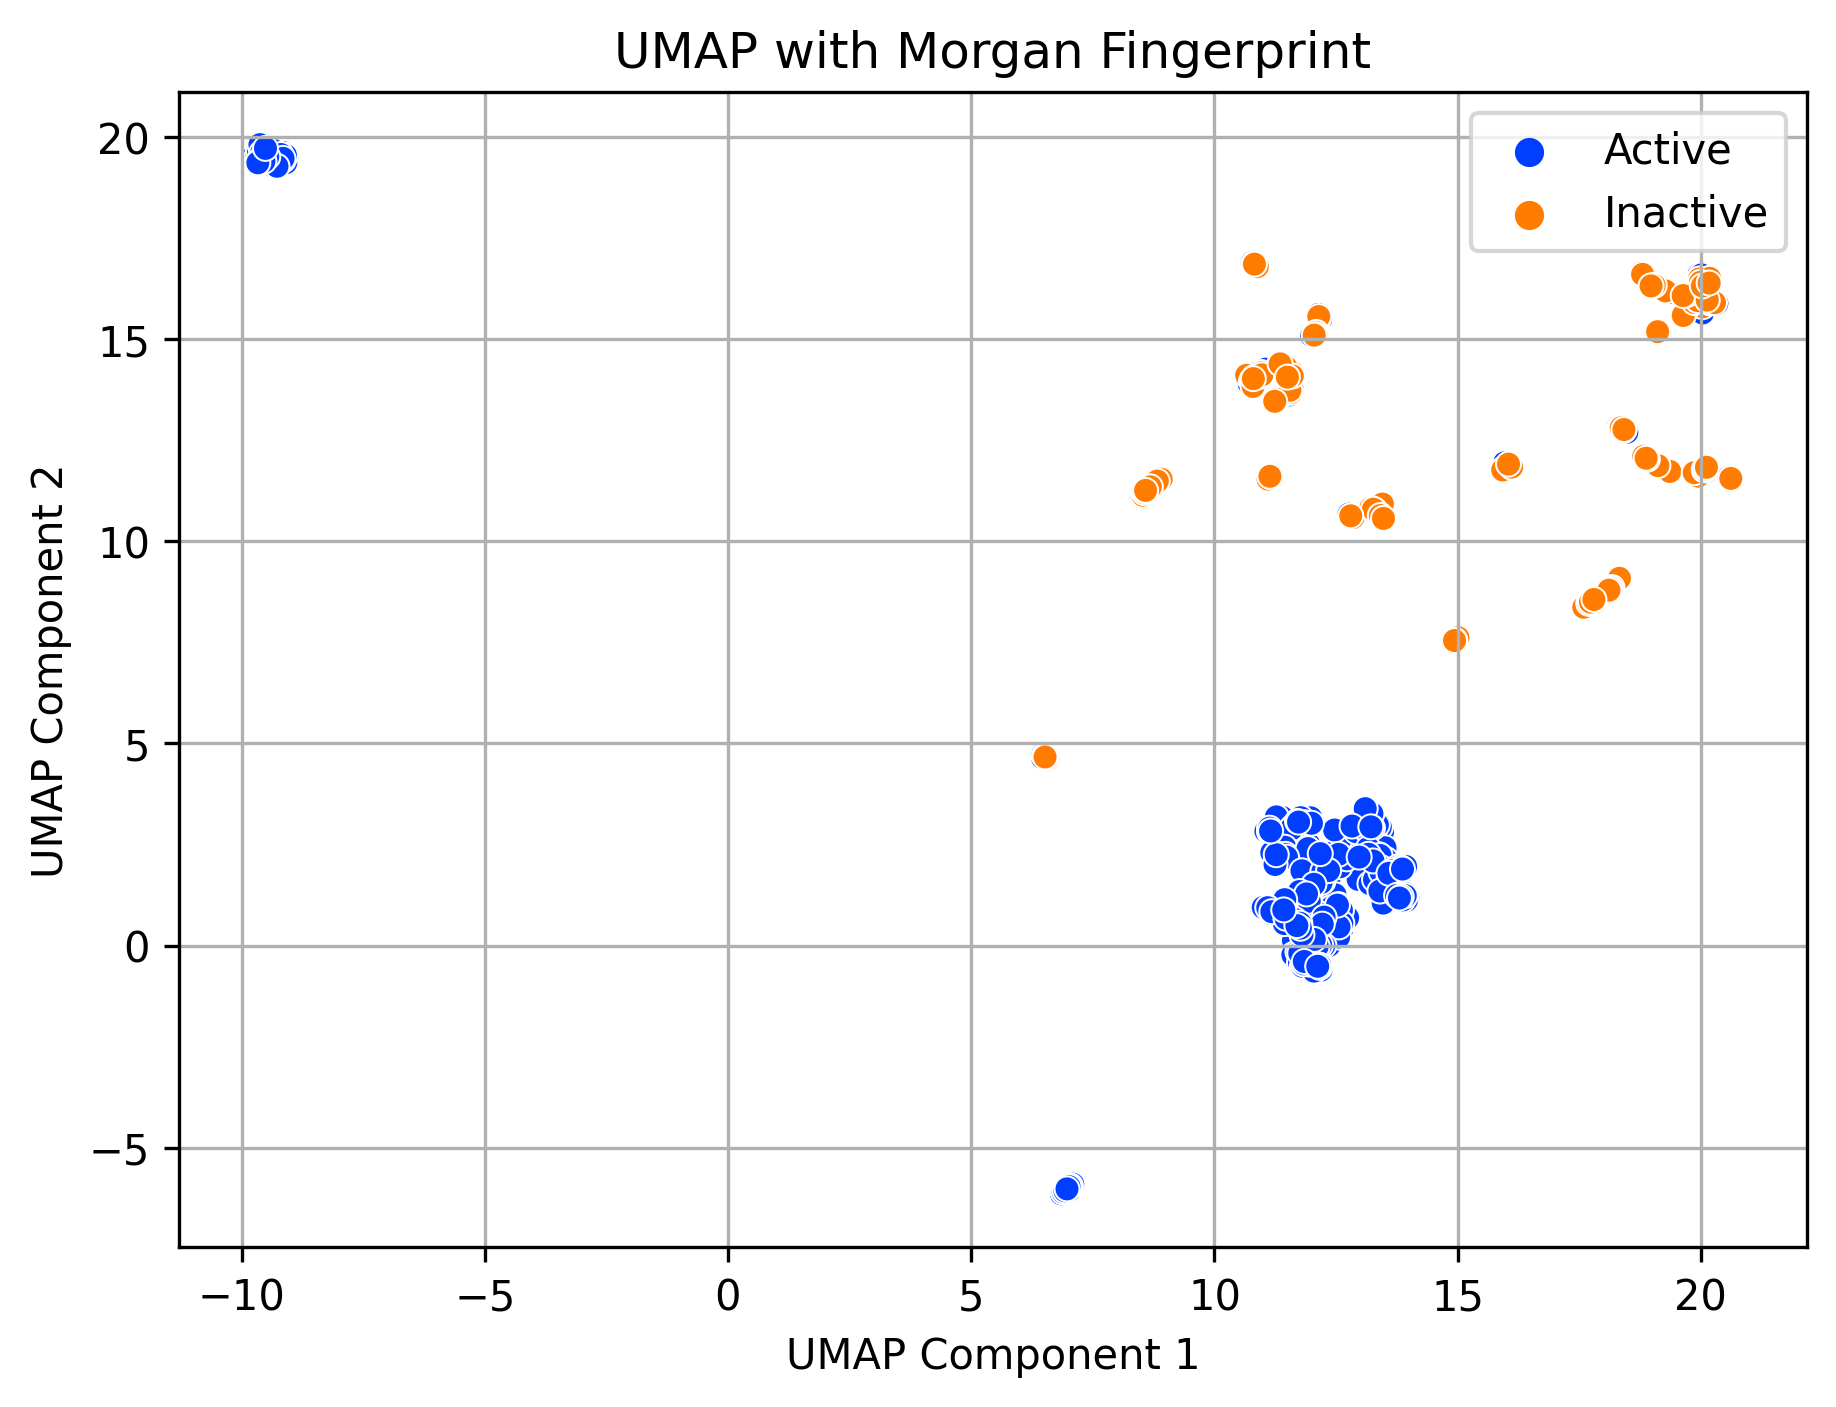

In [59]:
plt.figure(figsize = (7, 5), dpi=300)
sns.scatterplot(x='x', y='y', hue='bioactivity', data=plot_umap_morgan, palette='bright')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid()
plt.legend()
plt.title('UMAP with Morgan Fingerprint', fontsize=12)
plt.show()

UMAP with RDK5 Fingerprint

In [48]:
umapper = umap.UMAP(n_neighbors=50, 
                    n_components=2,
                    metric='euclidean', 
                    random_state=5,
                    )

In [49]:
data_umap_rdk5 = umapper.fit_transform(rdk5_df_umap)

In [50]:
data_umap_rdk5_x = pd.DataFrame(data_umap_rdk5[:, 0], columns = ['x'])
data_umap_rdk5_y = pd.DataFrame(data_umap_rdk5[:, 1], columns = ['y'])
bioactivity = pd.DataFrame(rdk5_df["bioactivity"].values, columns = ['bioactivity'])
plot_umap_rdk5 = pd.concat([bioactivity, data_umap_rdk5_x, data_umap_rdk5_y], axis = 1)
plot_umap_rdk5

,bioactivity,x,y
0,Active,11.466072,1.999271
1,Active,11.408918,1.916932
2,Active,31.683929,8.188358
3,Active,36.942829,10.480708
4,Active,17.324667,4.303530
...,...,...,...
579,Inactive,11.317430,-3.086321
580,Inactive,12.959970,-3.554096
581,Inactive,4.245449,-10.210290
582,Inactive,17.434269,4.879904


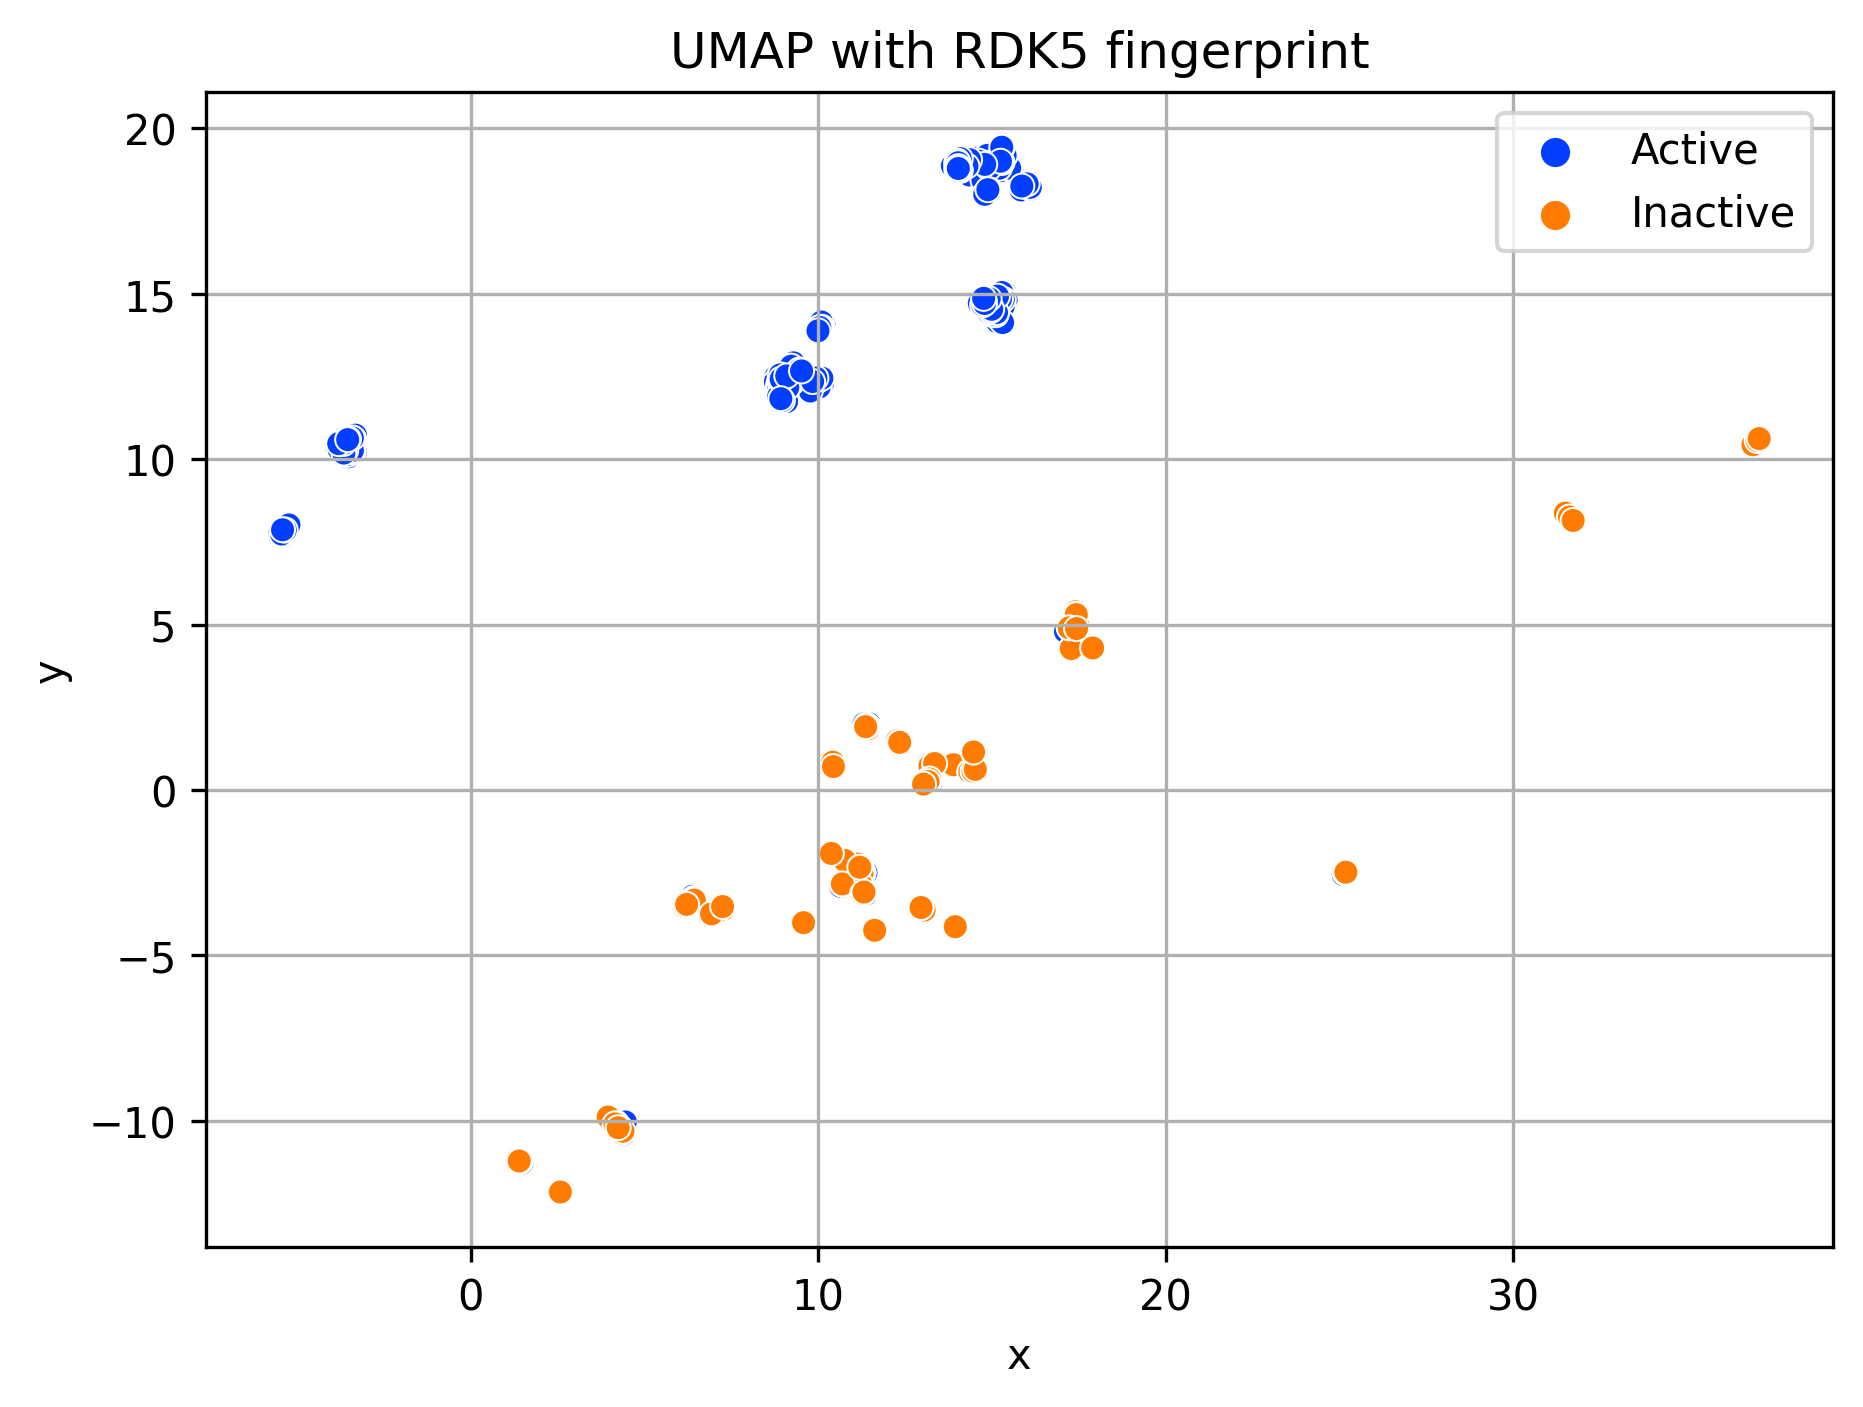

In [51]:
plt.figure(figsize = (7, 5), dpi=300)
sns.scatterplot(x='x', y='y', hue='bioactivity', data=plot_umap_rdk5, palette='bright')
plt.grid()
plt.legend()
plt.title('UMAP with RDK5 fingerprint', fontsize=12)
plt.show()

Clustering by Butina of Morgan FP

In [28]:
from rdkit.ML.Cluster import Butina

In [29]:
def tanimoto_distance_matrix(fp_list):
    
    dissimilarity_matrix = []
    
    for i in range(1, len(fp_list)):
        
        similarities = DataStructs.BulkTanimotoSimilarity(fp_list[i], fp_list[:i])
        dissimilarity_matrix.extend([1 - x for x in similarities])
    return dissimilarity_matrix

In [30]:
sim = DataStructs.TanimotoSimilarity(mfpts[0], mfpts[1])
print(f"Tanimoto similarity: {sim:.2f}, distance: {1-sim:.2f}")

Tanimoto similarity: 1.00, distance: 0.00


In [31]:
tanimoto_distance_matrix(mfpts)

[0.0,
 0.48809523809523814,
 0.48809523809523814,
 0.5955056179775281,
 0.5955056179775281,
 0.5063291139240507,
 0.1917808219178082,
 0.1917808219178082,
 0.45679012345679015,
 0.6022727272727273,
 0.5862068965517242,
 0.5862068965517242,
 0.3661971830985915,
 0.5384615384615384,
 0.5595238095238095,
 0.30666666666666664,
 0.30666666666666664,
 0.26086956521739135,
 0.5063291139240507,
 0.28767123287671237,
 0.55,
 0.5568181818181819,
 0.5568181818181819,
 0.3783783783783784,
 0.18461538461538463,
 0.5632183908045977,
 0.6352941176470588,
 0.3783783783783784,
 0.3246753246753247,
 0.3246753246753247,
 0.3513513513513513,
 0.5185185185185186,
 0.1594202898550725,
 0.5432098765432098,
 0.1515151515151515,
 0.475,
 0.37037037037037035,
 0.37037037037037035,
 0.6111111111111112,
 0.6914893617021276,
 0.35443037974683544,
 0.625,
 0.45679012345679015,
 0.6842105263157895,
 0.4698795180722891,
 0.5681818181818181,
 0.5681818181818181,
 0.25,
 0.5375,
 0.5411764705882354,
 0.3571428571428571

In [32]:
n = len(mfpts)

elem_triangular_matr = (n * (n - 1)) / 2

print(
    f"Elements in the triangular matrix ({elem_triangular_matr:.0f}) ==",
    f"tanimoto_distance_matrix(mfpts) ({len(tanimoto_distance_matrix(mfpts))})",
)

Elements in the triangular matrix (170236) == tanimoto_distance_matrix(mfpts) (170236)


In [33]:
def cluster_mfpts(fingerprints, cutoff=0.3):

    distance_matrix = tanimoto_distance_matrix(mfpts)
    clusters = Butina.ClusterData(distance_matrix, len(mfpts), cutoff, isDistData=True)
    clusters = sorted(clusters, key=len, reverse=True)
    return clusters

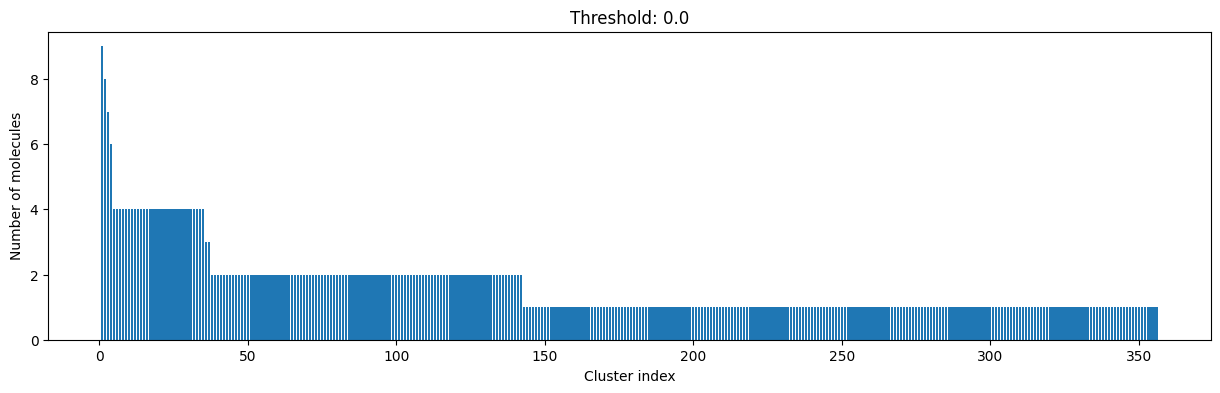

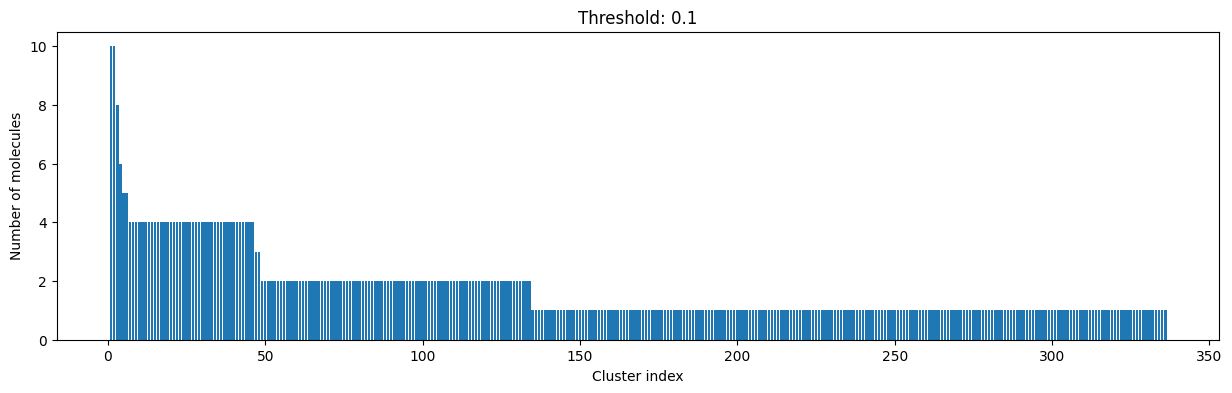

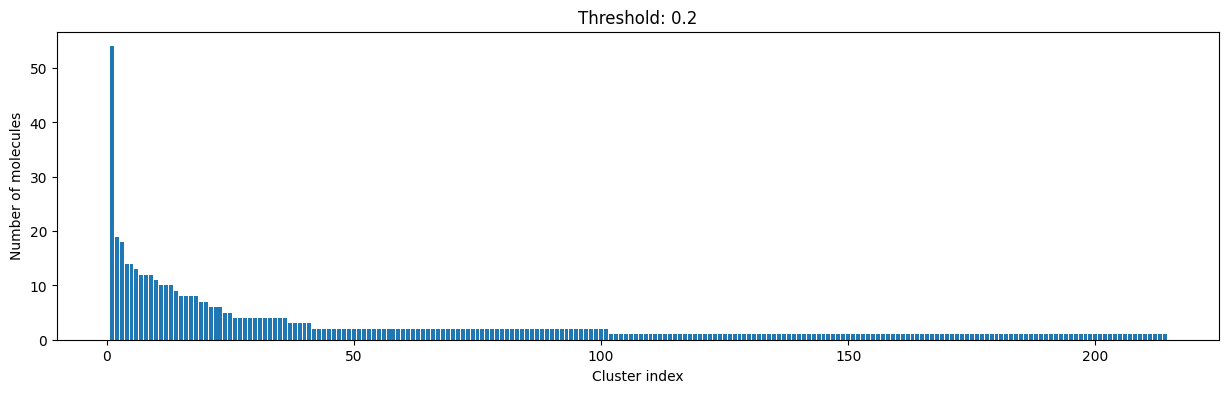

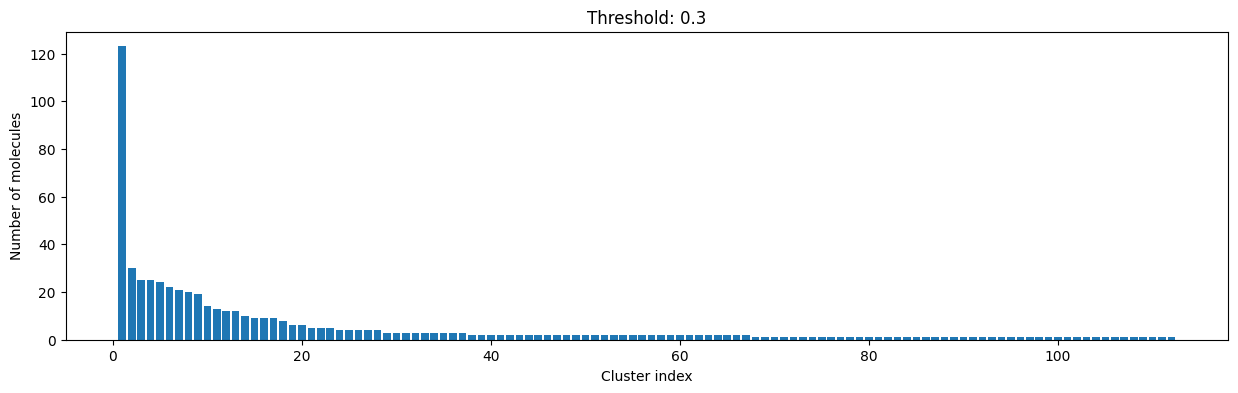

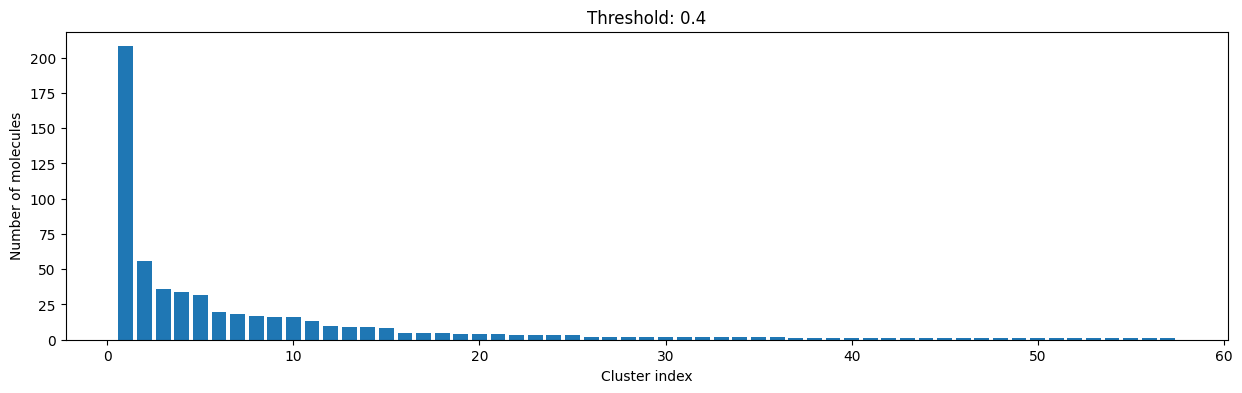

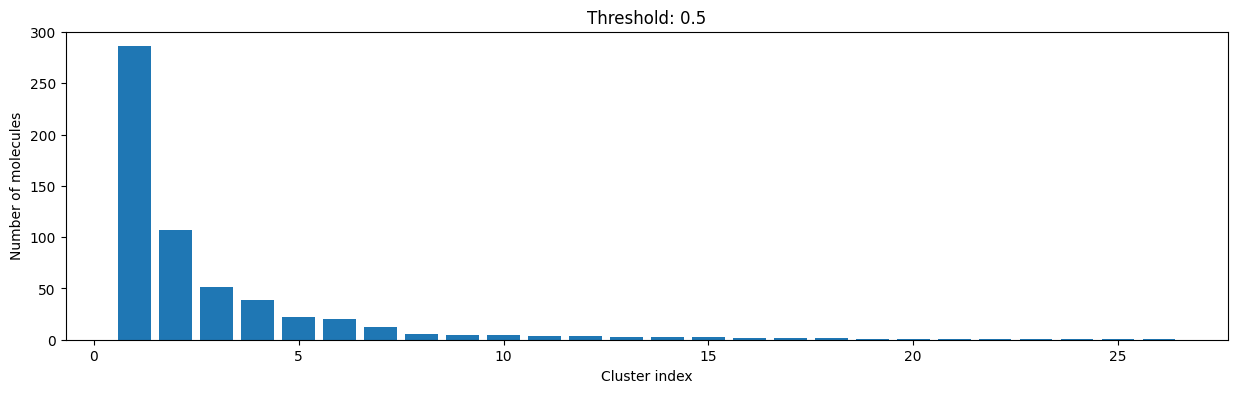

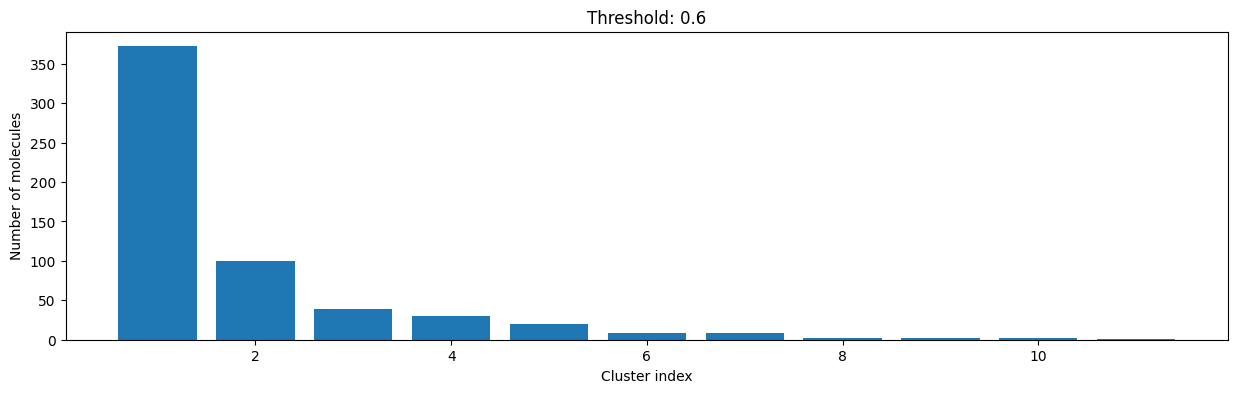

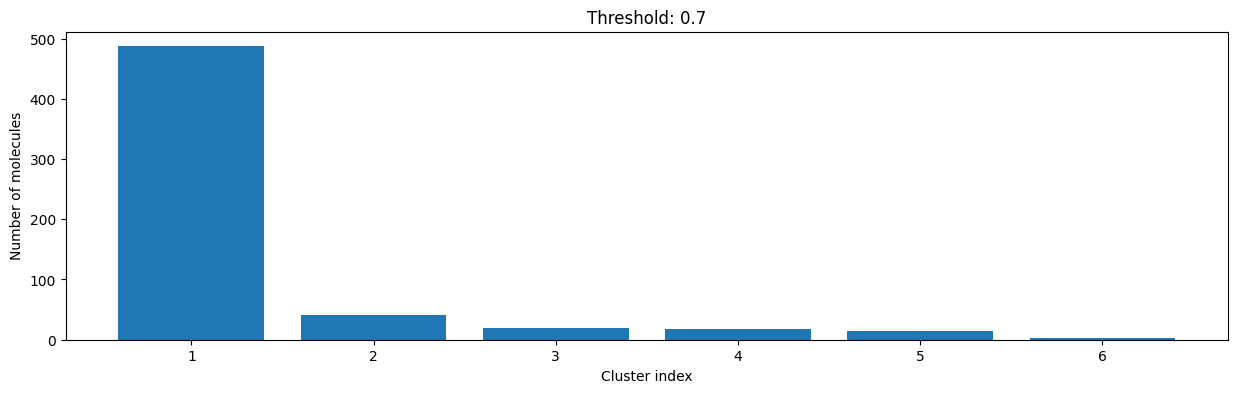

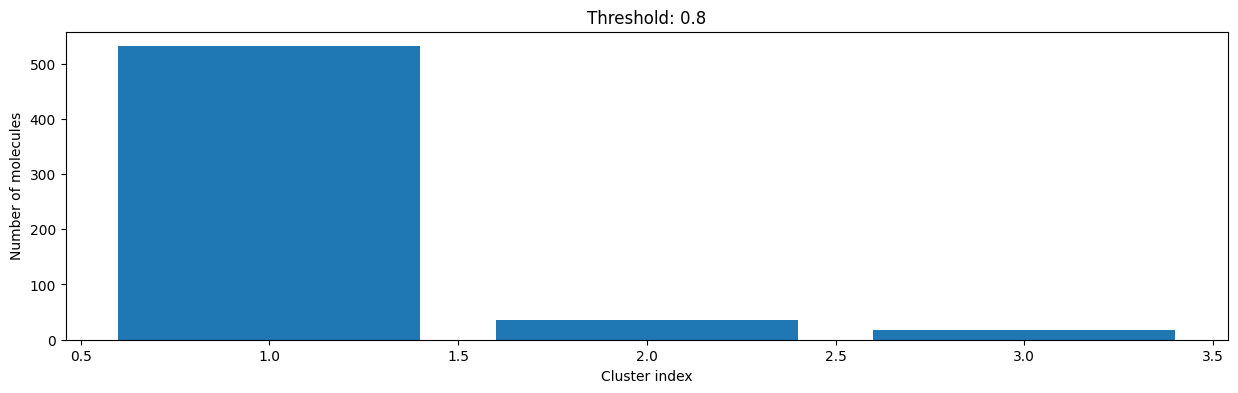

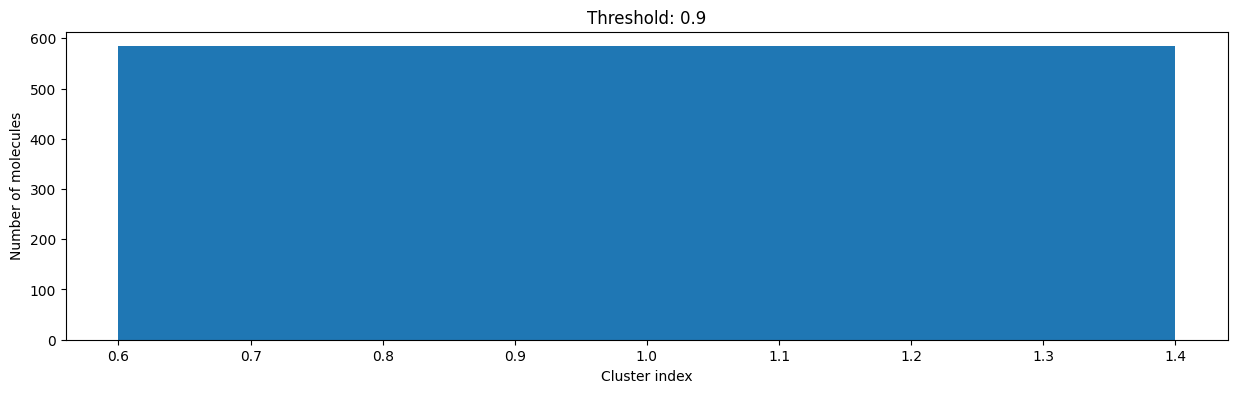

In [34]:
for cutoff in np.arange(0.0, 1.0, 0.1):
    clusters = cluster_mfpts(mfpts, cutoff=cutoff)
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.set_title(f"Threshold: {cutoff:3.1f}")
    ax.set_xlabel("Cluster index")
    ax.set_ylabel("Number of molecules")
    ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters], lw=5)
    plt.show()

In [35]:
from sklearn.decomposition import PCA

In [36]:
data_umap_morgan

array([[22.349194  , 18.697994  ],
       [22.337063  , 18.686157  ],
       [10.067132  , 20.10087   ],
       ...,
       [-1.8703291 ,  0.10876726],
       [16.607006  , 20.050856  ],
       [17.27126   , 12.609506  ]], dtype=float32)

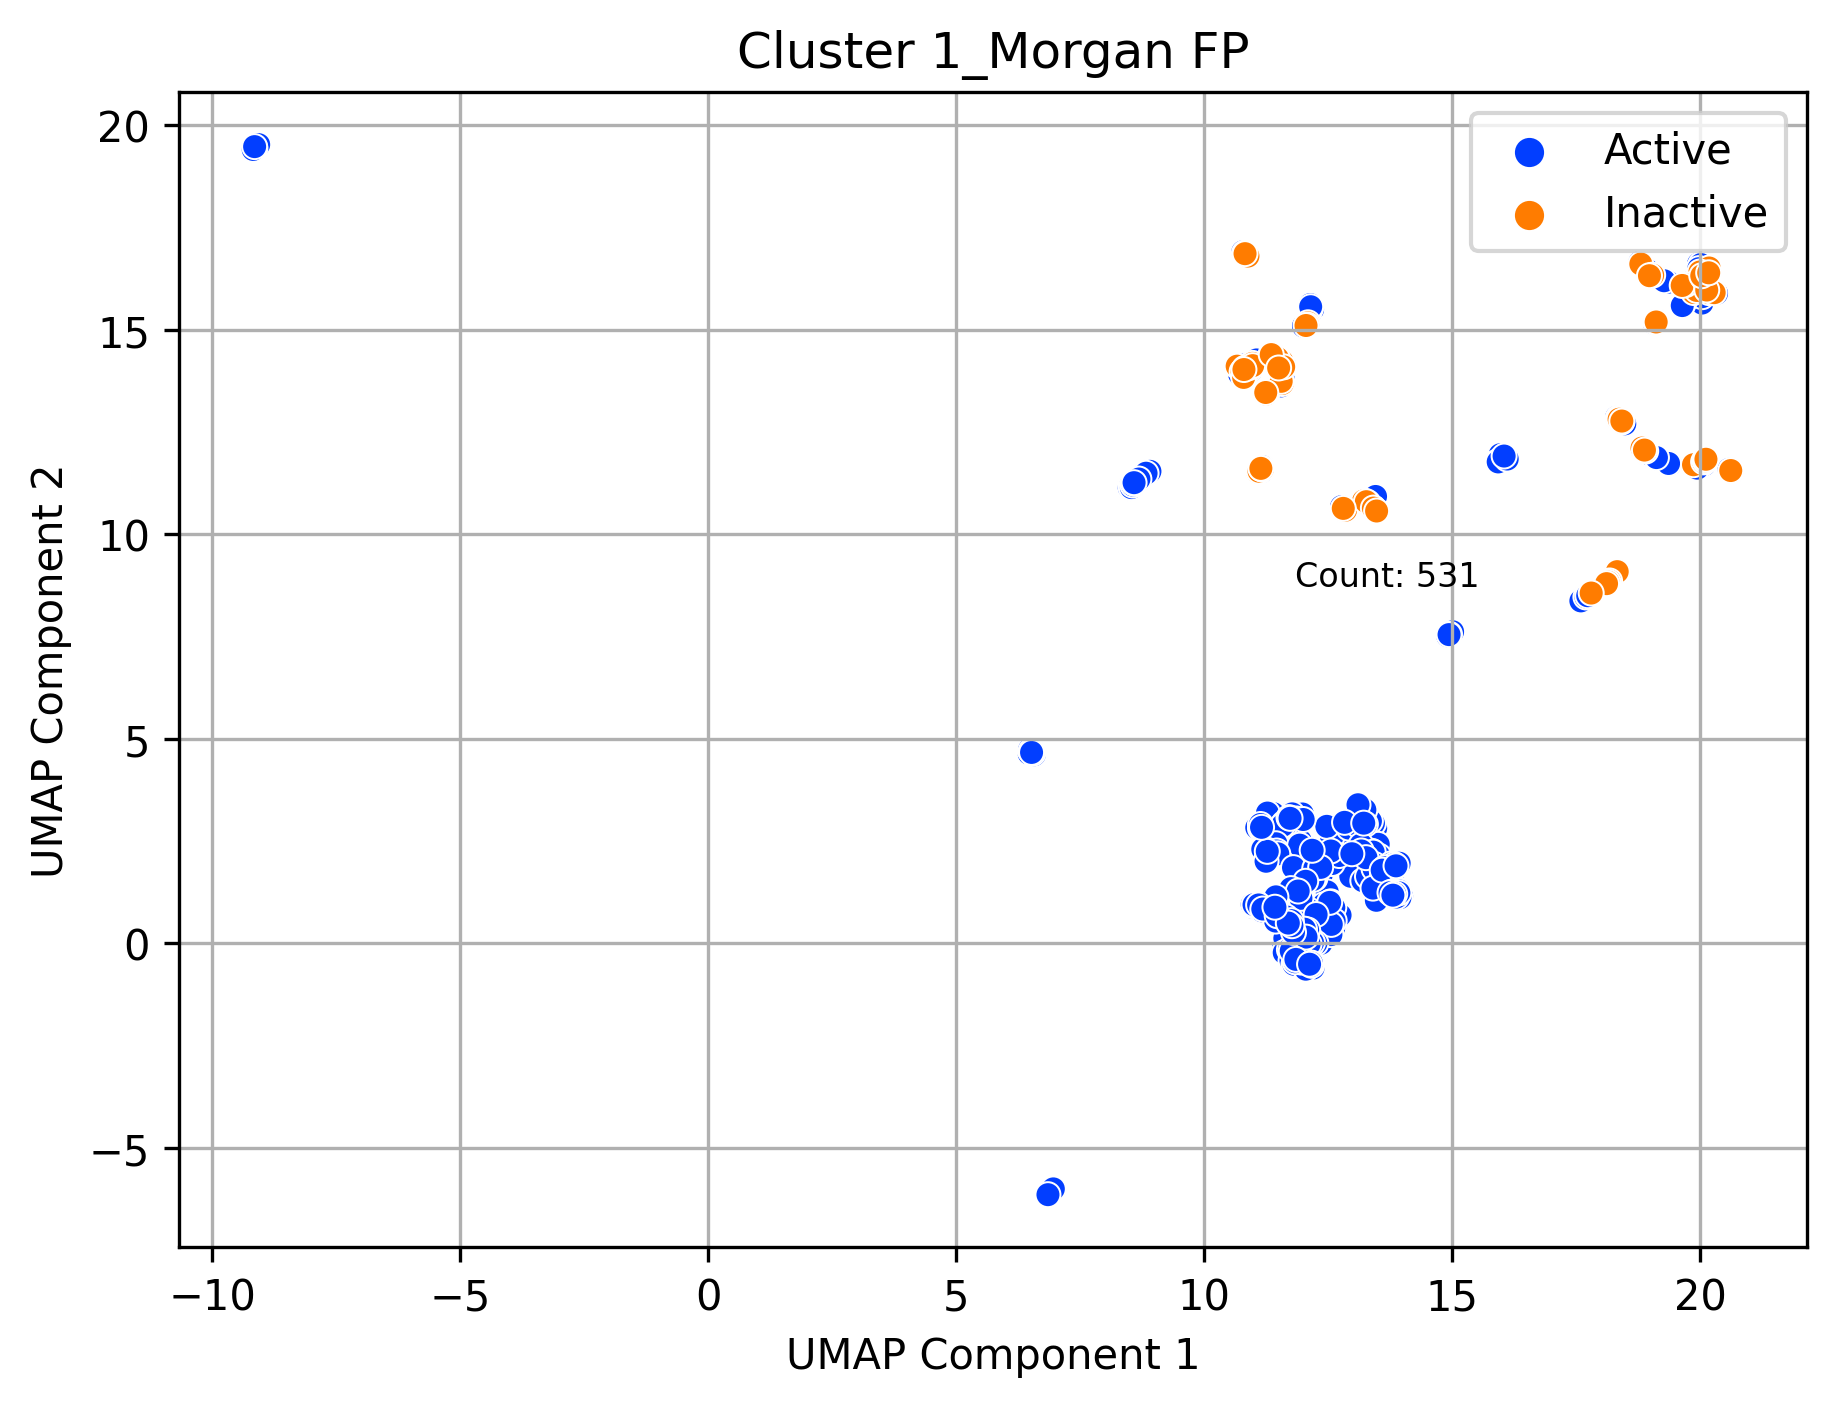

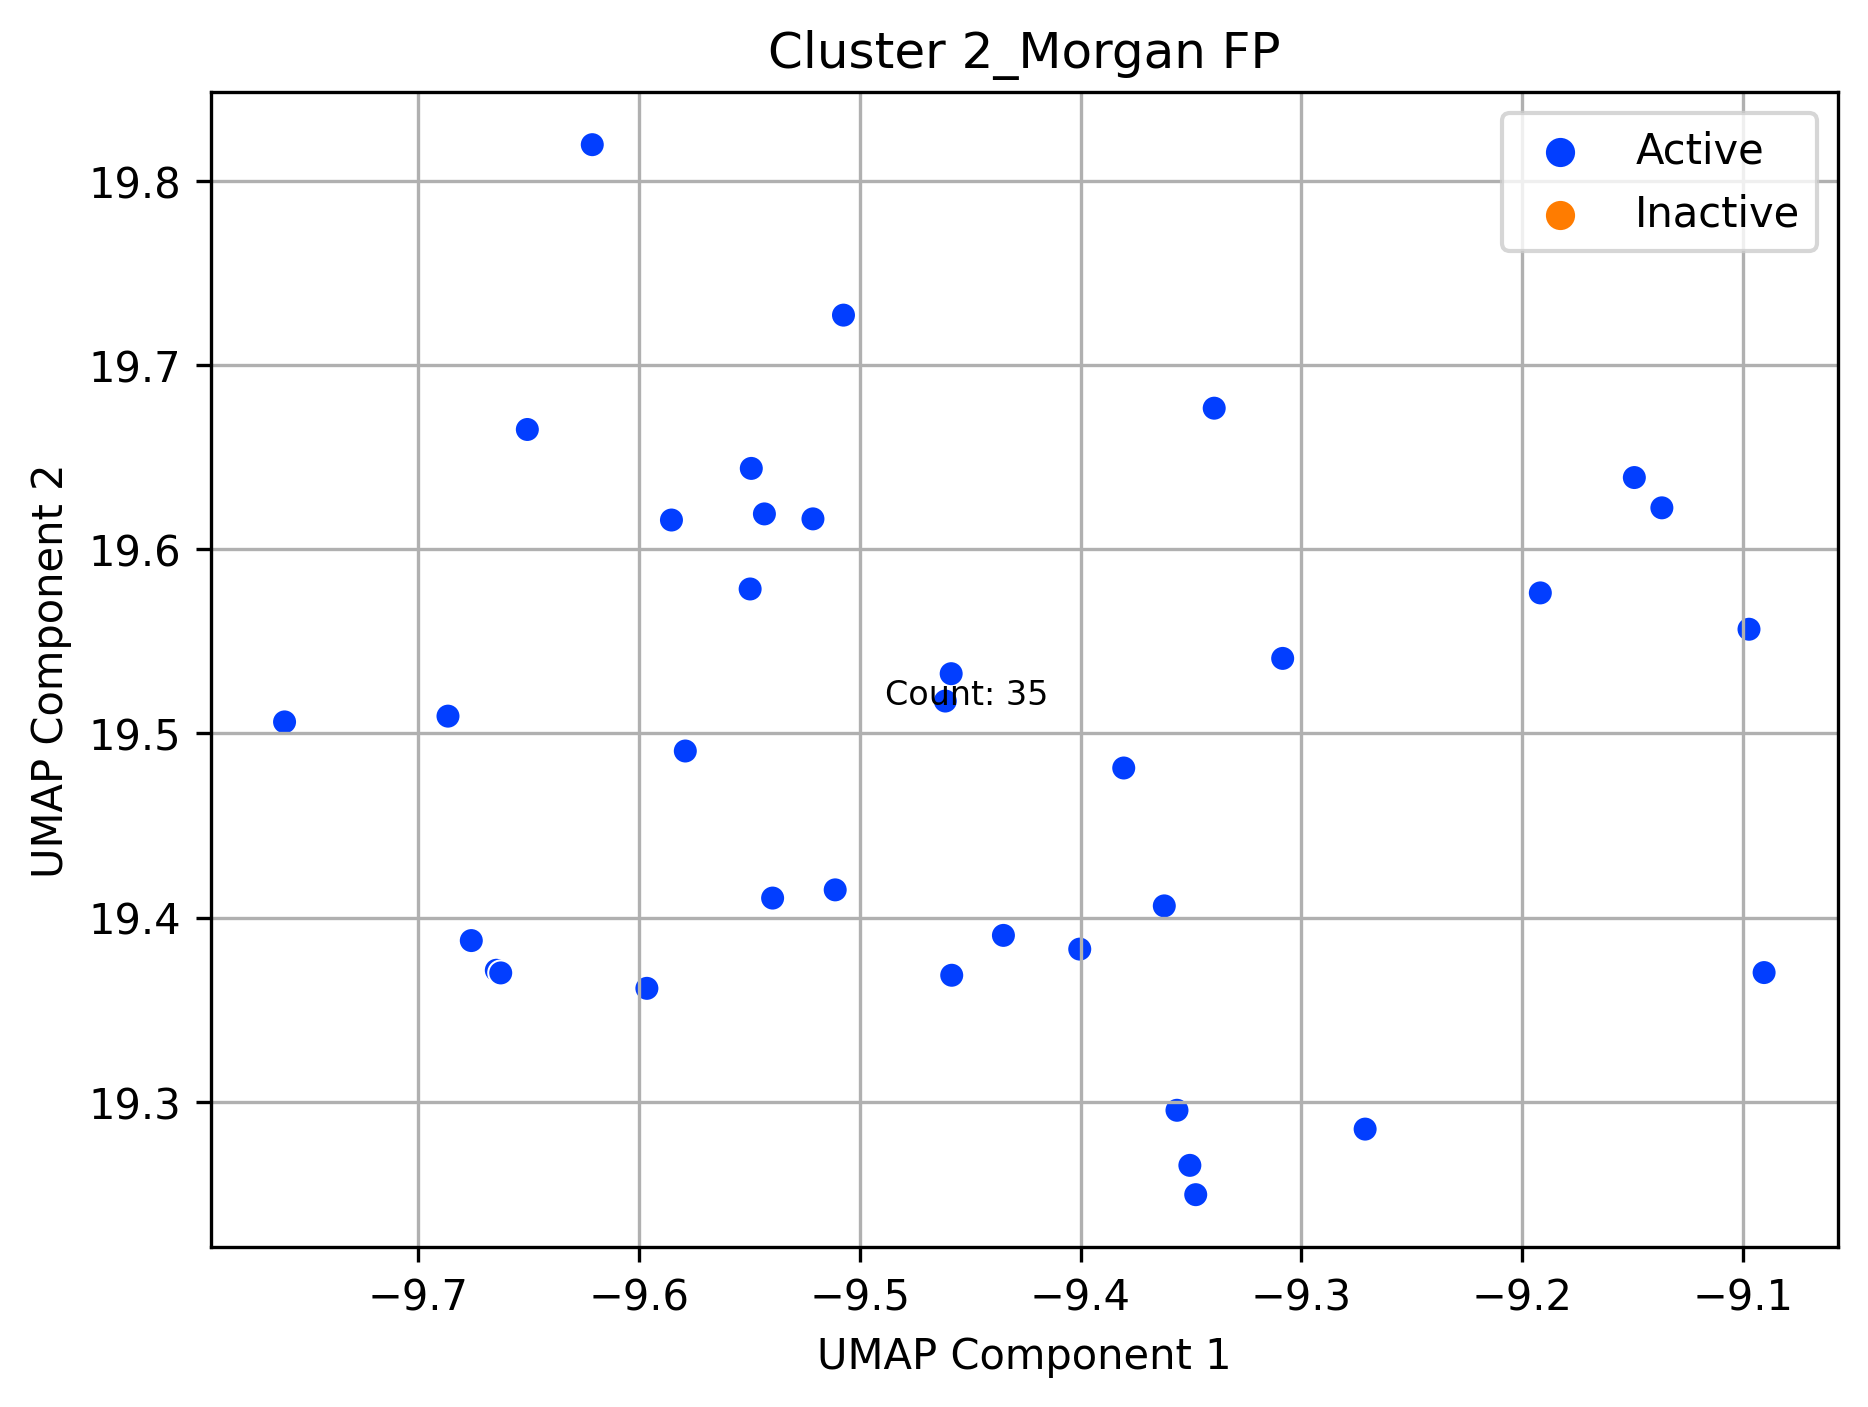

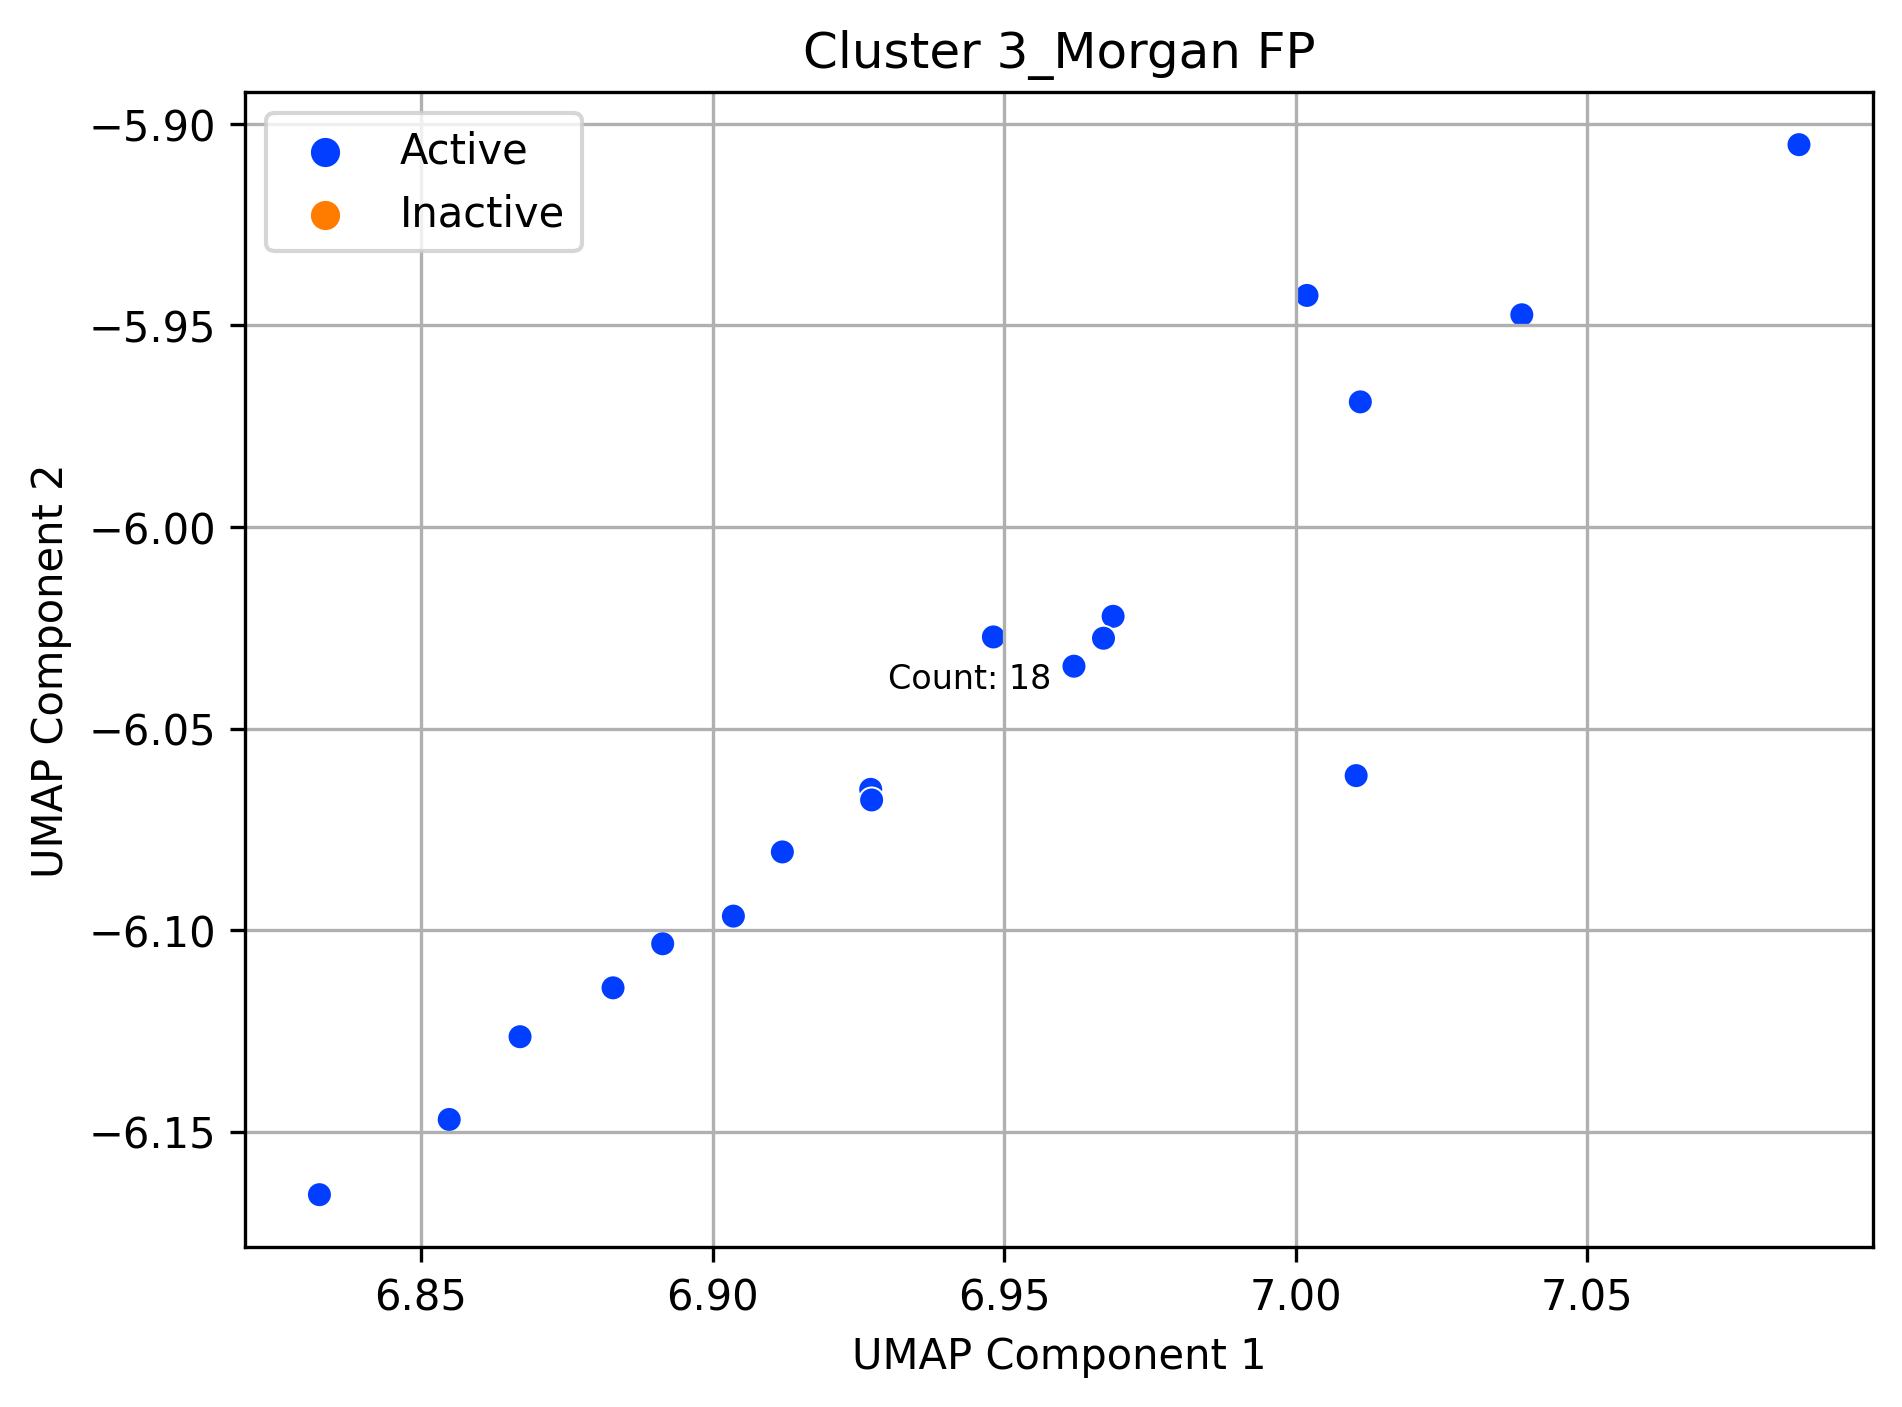

In [58]:
# Start with UMAP
umapper = umap.UMAP(n_neighbors=50, 
                    n_components=2,
                    metric='euclidean',
                    random_state=5)

data_umap_morgan = umapper.fit_transform(morganfp_df_umap)

# Apply Butina functions
cutoff = 0.8
clusters = cluster_mfpts(data_umap_morgan, cutoff=cutoff)


# Create a scatter plot using Seaborn
for cluster_index, cluster in enumerate(clusters, start=1):
    cluster_molecule_indices = cluster 
    
    cluster_coords = data_umap_morgan[cluster_molecule_indices, :]
    
    x_coords = cluster_coords[:, 0]
    y_coords = cluster_coords[:, 1]
    
    cluster_labels = np.full(len(cluster_molecule_indices), f"Cluster {cluster_index}")
    
    
    data_umap_morgan_x = pd.DataFrame(x_coords, columns = ['x'])
    data_umap_morgan_y = pd.DataFrame(y_coords, columns = ['y'])
    bioactivity = pd.DataFrame(morganfp_df["bioactivity"].values, columns = ['bioactivity'])
    plot_umap_morgan_butina = pd.concat([bioactivity, data_umap_morgan_x, data_umap_morgan_y], axis = 1)
    plot_umap_morgan_butina
    
    plt.figure(figsize=(7, 5), dpi=300)
    sns.scatterplot(x="x", y="y", hue='bioactivity' , data=plot_umap_morgan_butina, palette='bright')
    plt.xlabel("UMAP Component 1")
    plt.ylabel("UMAP Component 2")
    plt.title(f"Cluster {cluster_index}_Morgan FP")
    
    cluster_size = len(cluster_molecule_indices)
    mean_x = np.mean(data_umap_morgan[cluster_molecule_indices, 0])
    mean_y = np.mean(data_umap_morgan[cluster_molecule_indices, 1])
    plt.annotate(f"Count: {cluster_size}", (mean_x, mean_y), xytext=(0, 10),textcoords="offset points", ha='center', fontsize=8)

    plt.legend()
    plt.grid()
    plt.show()

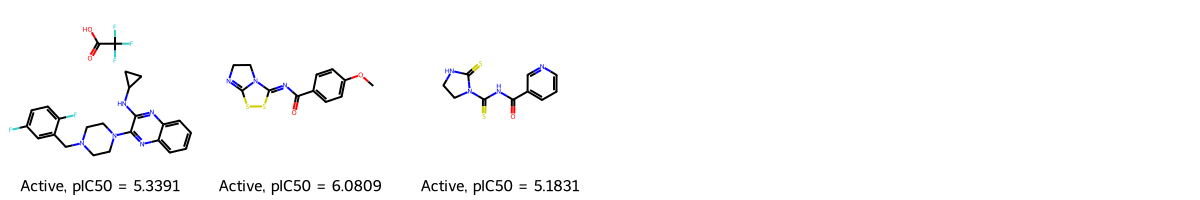

In [60]:
Draw.MolsToGridImage(
    [compounds_morgan_structure["Structure"][clusters[i][0]] for i in range(3)],
    molsPerRow=6,
    legends=[
        f"{compounds_morgan_structure['bioactivity'][clusters[i][0]]}, pIC50 = {compounds_morgan_structure['pIC50'][clusters[i][0]]:.4f}"
        for i in range(3)]
)